In [37]:
import numpy as np 
from matplotlib import pyplot as plt 
%config InlineBackend.figure_formats = ['svg'] 

# Session 1

## Exercise 3

$K_k=-(R+B^TP_{k+1}B)^{-1}P_{k+1}A$

$P_k=Q+A^TP_{k+1}(A+BK_k)$

In [20]:
Ts = 0.5
C = np.array([1.0, -2.0/3.0]).reshape([-1,2])
Q = C.T @ C + 0.001 * np.eye(2) 
R = 0.1
Pf = Q 

A = np.array([[1.0, Ts],[0.0, 1.0]])
B = np.array([[0.0],[-Ts]])

def do_recurse(P):
    BTP = B.T@P
    K = np.linalg.solve(R+BTP@B, -BTP@A)
    P = Q+A.T@P@(A+B@K)

    return [P, K]

print(do_recurse(Pf))


[array([[ 1.47630674, -0.74442925],
       [-0.74442925,  0.4596056 ]]), array([[-1.57707977,  0.26521225]])]


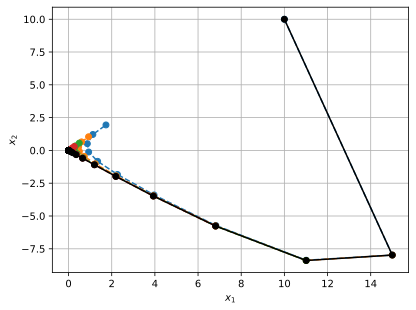

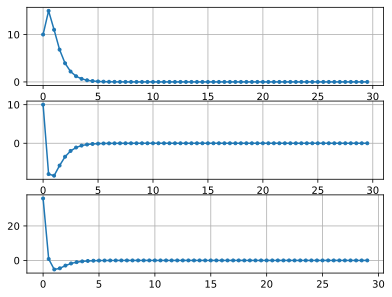

In [106]:
x0 = np.array([10,10]).reshape(-1,1)
N = 10

times = np.arange(0.0,30.0,step=Ts)
x = x0.copy() 
pred_trajectories = []
actual_trajectory = [x] 
controllers = [] 
controls = []
for t in times[1:]: 

    # do the recursion 
    P = Pf.copy()
    Ks = [] 
    Ps = [] 
    for i in range(N):
        [P, K] = do_recurse(P) 
        Ks.append(K) 
        Ps.append(P)

    # run the prediction
    x_pred = x.copy()
    traj = [x_pred] 
    for i in range(N): 
        x_pred = A @ x_pred + B @ Ks[N-1-i] @ x_pred
        traj.append(x_pred) 

    pred_trajectories.append(np.array(traj))
    controllers.append(Ks[-1])
    
    u = Ks[-1] @ x 
    x = A @ x + B @ u   

    actual_trajectory.append(x) 
    controls.append(u) 

controls = np.array(controls) 

plt.figure(1)
plt.clf()
for i in range(4): 
    plt.plot(pred_trajectories[i][:,0,:], pred_trajectories[i][:,1,:], 'o--')

actual_trajectory = np.array(actual_trajectory) 
plt.plot(actual_trajectory[:,0,:], actual_trajectory[:,1,:], 'ko-')
plt.grid() 
plt.xlabel(r"$x_1$") 
plt.ylabel(r"$x_2$") 

plt.figure(2)
plt.subplot(311)
plt.plot(times, actual_trajectory[:,0,:], '.-')
plt.grid() 
plt.subplot(312) 
plt.plot(times, actual_trajectory[:,1,:], '.-')
plt.grid() 
plt.subplot(313) 
plt.plot(times[:-1], controls.squeeze(), '.-') 
plt.grid() 
plt.show() 